### Student Information
Name: 李佾昀

Student ID: 107034013

GitHub ID: tool0717

Kaggle name: 107034013

Kaggle private scoreboard snapshot: [Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2021-Lab2-master Repo](https://github.com/fhcalderon87/DM2021-Lab2-master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2021-lab2-hw2/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 24th 11:59 pm, Friday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 29th 11:59 pm, Wednesday)__. 

---
# Part1: Lab2 Exercises
## 1. Data Preparation
### 1.1 Load data

In [3]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)

# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

---
### Exercise 1 (Take home): 
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
def top30freq(df):
    count_vect = CountVectorizer()
    count_vect_fit = count_vect.fit_transform(df.text)
    term_frequencies = []
    for j in range(0,count_vect_fit.shape[1]):
        term_frequencies.append(sum(count_vect_fit[:,j].toarray()))
    term_frequencies = np.asarray(count_vect_fit.sum(axis=0))[0]
    data = {'feature_names':count_vect.get_feature_names(),'term_frequencies':term_frequencies}
    df_freq = pd.DataFrame(data)
    df_freq_sorted = df_freq.sort_values(by=['term_frequencies'],ascending = False)

    plt.plot(df_freq_sorted.feature_names[:30],df_freq_sorted.term_frequencies[:30])

    plt.fill_between(df_freq_sorted.feature_names[:30],df_freq_sorted.term_frequencies[:30], color = 'yellow')
    plt.xticks(rotation=90)
    plt.figure(figsize=(6,4))
    plt.show()

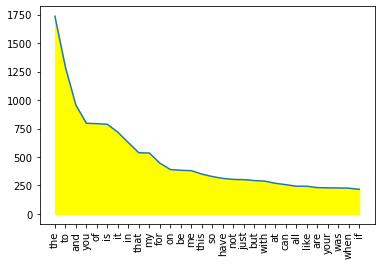

<Figure size 432x288 with 0 Axes>

In [6]:
top30freq(train_df)

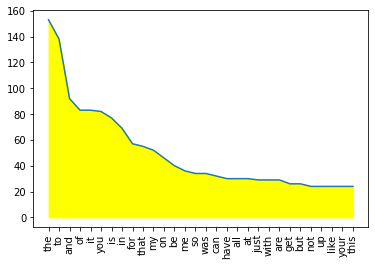

<Figure size 432x288 with 0 Axes>

In [7]:
top30freq(test_df)

### 1.2 Save data

In [8]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

### 1.3 Exploratory data analysis (EDA)

---
## 2. Feature engineering
### Using Bag of Words

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

C:\Users\Lee\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(3613, 500)

---
### Exercise 2 (Take home): 
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [10]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=1000)
tfidf_vect.fit(train_df['text'])
# train_tfidf_features = tfidf_vect.transform(train_df.text)
feature_name = tfidf_vect.get_feature_names()
feature_name[100:110]

['bitter',
 'black',
 'blacks',
 'blame',
 'blessed',
 'blood',
 'bloody',
 'blues',
 'body',
 'boiling']

---
## 3. Model
### 3.1 Decision Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habbit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [13]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=0)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred_dt = DT_model.predict(X_train)
y_test_pred_dt = DT_model.predict(X_test)

## so we get the pred result
y_test_pred_dt[:10]

array(['anger', 'fear', 'anger', 'fear', 'fear', 'joy', 'joy', 'fear',
       'fear', 'joy'], dtype=object)

---
## 4. Results Evaluation

In [14]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train_dt = accuracy_score(y_true=y_train, y_pred=y_train_pred_dt)
acc_test_dt = accuracy_score(y_true=y_test, y_pred=y_test_pred_dt)

print('training accuracy: {}'.format(round(acc_train_dt, 2)))
print('testing accuracy: {}'.format(round(acc_test_dt, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [15]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_dt))

              precision    recall  f1-score   support

       anger       0.64      0.69      0.67        84
        fear       0.65      0.67      0.66       110
         joy       0.68      0.66      0.67        79
     sadness       0.66      0.59      0.62        74

    accuracy                           0.66       347
   macro avg       0.66      0.65      0.66       347
weighted avg       0.66      0.66      0.66       347



In [16]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true=y_test, y_pred=y_test_pred_dt) 
print(cm_dt)

[[58 16  6  4]
 [14 74 10 12]
 [ 9 11 52  7]
 [ 9 13  8 44]]


In [17]:
# Function for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

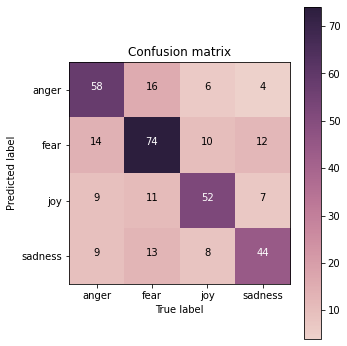

In [18]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_dt, classes=my_tags, title='Confusion matrix')

### Exercise 3 (Take home): 
Can you interpret the results above? What do they mean?

### Answer here
The confusion matrix shows the distribution of the true classification and the prediction. For example, 58 of'anger' texts were predicted as 'anger' correctly, while 14 of 'anger' texts were predicted as 'fear' and 9 of 'anger' texts were predicted as 'joy'.
An confusion matrix could help data scientists or programmers quickly identify where the incorrect predictions occured or whether a class of item bias towards another. For example, if from the confusion matrix we see that most classification bias towards a certain class, we might want to examine whether its caused by unbalanced training data.

### Exercise 4 (Take home): 
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

In [20]:
# Answer here

# setup train and test data, using the BOW method above
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# build Naive Bayes model and train it
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train, y_train)

# predict by the Naive Bayes model trained above
y_train_pred_nb = clf.predict(X_train)
y_test_pred_nb = clf.predict(X_test)

# calculate the accuracy score
from sklearn.metrics import accuracy_score
acc_train_nb = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
acc_test_nb = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)
print('training accuracy: {}'.format(round(acc_train_nb, 2)))
print('testing accuracy: {}'.format(round(acc_test_nb, 2)))

training accuracy: 0.79
testing accuracy: 0.7


In [23]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred_nb))

              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



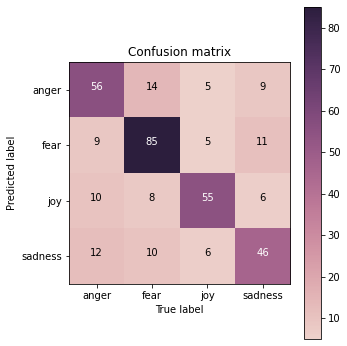

In [21]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix
cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb) 

# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb, classes=my_tags, title='Confusion matrix')

### Exercise 5 (Take home): 
How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [24]:
# Answer Here
from sklearn.metrics import f1_score
f1_test_dt = f1_score(y_test, y_test_pred_dt, average = 'macro')
f1_test_nb = f1_score(y_test, y_test_pred_nb, average = 'macro')
                      
print('Decision Tree:')
print('training accuracy: {}'.format(round(acc_train_dt, 2)))
print('testing accuracy: {}'.format(round(acc_test_dt, 2)))
print('testing f1-score: {}'.format(round(f1_test_dt, 2)))

print('\nNaive Bayes:')
print('training accuracy: {}'.format(round(acc_train_nb, 2)))
print('testing accuracy: {}'.format(round(acc_test_nb, 2)))
print('testing f1-score: {}'.format(round(f1_test_nb, 2)))

Decision Tree:
training accuracy: 0.99
testing accuracy: 0.66
testing f1-score: 0.66

Naive Bayes:
training accuracy: 0.79
testing accuracy: 0.7
testing f1-score: 0.69


In [25]:
y_test.value_counts()

fear       110
anger       84
joy         79
sadness     74
Name: emotion, dtype: int64

##### Descriptions of the performance of Decision Tree and Naive Bayes
Comparing the testing data accuracy and f1-score of the two models, we can simply conclude that the Naive Bayes performs better than the Decision Tree. Among the results, the Decision Tree showed significantly high accuracy(0.99) during the training session but showed a much lower accuracy(0.66) during the testing session. We can simply conclude believe that it's due to overfitting during training, where the Decision Tree model over-memorizing the training data without generating wisdom to learn the pattern and logistics to classify. I think this is the main reason Decision Tree performed worse than Naive Bayes.

The distribution of emotion labels of the test dataset is as shown above. It is not uniformly distributed, where 'fear' text appears more frequently than the other types. As learned during class, Naive Bayes is quite capable of dealing with the unbalanced dataset. And by observing the confusion matrix, we can see that proportionally more wrong guesses appeared at predictions of 'fear' text. Therefore, I believe that this is one of the reasons Decision Tree performed less ideal.

The dataset has only 3613 records, which is considerably small. Hence, I think the fact that Naive Bayes performs better while coping with a small dataset is another reason why it won out Decision Tree.


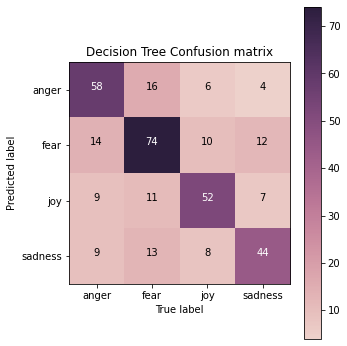

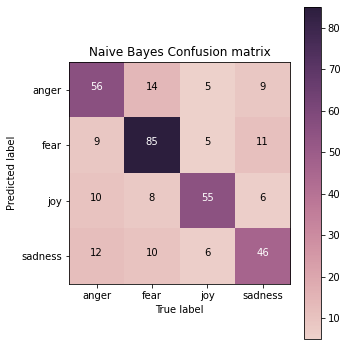

In [26]:
# Answer here
plot_confusion_matrix(cm_dt, classes=my_tags, title='Decision Tree Confusion matrix')
plot_confusion_matrix(cm_nb, classes=my_tags, title='Naive Bayes Confusion matrix')

---
### Exercise 6 (Take home):   

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

#### Answer here
Overfitting means the model over-memorizing or over-copying the attributes of the training dataset and fits the training dataset more and more without generating wisdom to learn the pattern and logistics for classifications. Consequently, the model is not capable of accurately and correctly predicting the validation dataset, leading it to high validation loss.

In the plots, the training accuracy raised and training loss decreased over epochs, while the validation accuracy remains low and the validation loss increased fast. From the description above, we can conclude that the plots are a typical sample of an overfitting model training. We can increase the size of the dataset and reduce the complexity of the model(unnecessary assumptions or restrictive) to avoid overfitting.

### Exercise 7 (Take home): 

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

#### Answer here
Averaging the word vectors from word2vec is a simple but efficient method of representing sentences by word vectors. Another similar approach is to weight word vectors with their TF-IDF to decrease the influence of the most common words, which probably should be treated as stopwords.

Combining word vectors in an order given by a parse tree of a sentence using matrix-vector operations is proved to be a feasible method, too. (reference: https://nlp.stanford.edu/~socherr/EMNLP2013_RNTN.pdf)


---
## 7. Word2Vector

### 7.4 Using a pre-trained w2v model

In [30]:
import os
path = "./"
os.listdir(path + "/GoogleNews")

from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

---
## 8. Clustering: k-means

### Exercise 8 (Take home): 

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [31]:
# Answer here
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 15
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]       
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]       
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]       
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]       

# print('angry_words: ', angry_words)

target_words = angry_words + happy_words + sad_words + fear_words
# print('\ntarget words: ')
# print(target_words)

# print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
# print(color)

C:\Users\Lee\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


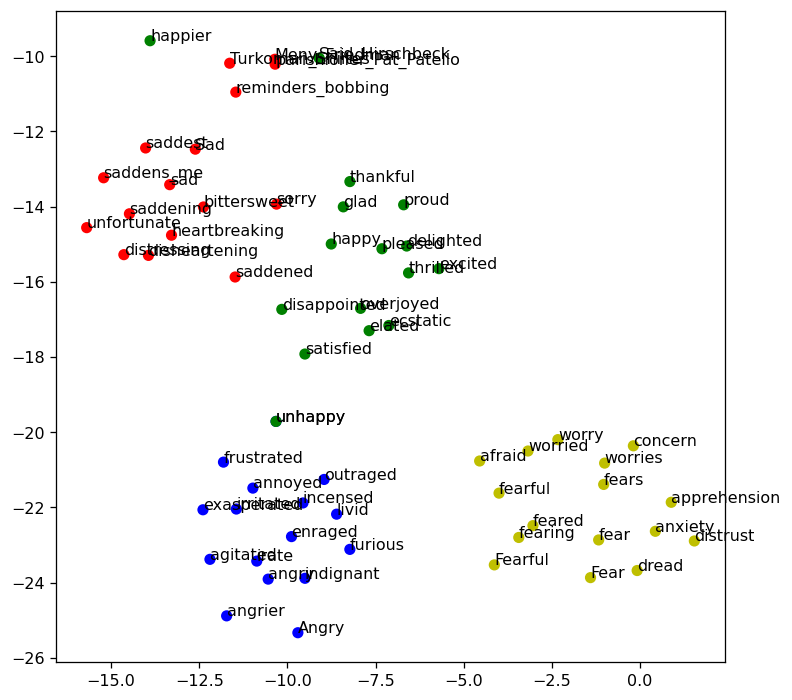

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
# all_word = list(model.vocab.keys())
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

# Part3: Report for the competition

## 1 Data Preprocessing

### 1.1 Data Preparing
Read the tweet text datasets as a class structure. Extract 'tweet_id' and its contents.
Remove the needless informations.

In [61]:
import numpy as np
import pandas as pd

temp = []
f = open('./kaggle/tweets_DM.txt',"r")
for line in f.readlines():
    temp.append(line)

In [62]:
for i in range(len(temp)):
    st = temp[i].index("tweet_id")
    l = len("tweet_id")
    temp[i] = temp[i].replace(temp[i][:st-1], "").replace('"tweet_id": ','')
    
    st = temp[i].index('}}, "_crawldate"')
    l = len(', "_crawldate"')
    temp[i] = temp[i].replace(temp[i][st:], "").replace('"text": ','')
    

Read 'data_identification.csv' to know which data is train data and which is test data. Merge this dataframe that contains 'data_identification' labels with the dataframe (above) that contains the tweet texts into dataframe 'df'.

In [63]:
df_label = pd.read_csv('./kaggle/data_identification.csv')
df_label = df_label.rename(columns = {"tweet_id":"id"})

In [64]:
data = []
count = 0
for i in temp:
    count += 1
#     if count%10000==0:
#         print(count)
    d = i.split('", "')
    d[0] = d[0].replace('"','')
    d[1] = d[1].replace('"','')
    data.append(d)

In [65]:
df_temp = pd.DataFrame(data, columns = ['id','text'])
df = df_temp.merge(df_label,how = "outer", on = 'id')
df.head()

,id,text,identification
0,0x376b20,People who post \add me on #Snapchat\ must be ...,train
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,0x28b412,"Confident of your obedience, I write to you, k...",test
3,0x1cd5b0,Now ISSA is stalking Tasha \ud83d\ude02\ud83d\...,train
4,0x2de201,\Trust is not the same as faith. A friend is s...,test


Group the content in 'df' and seperate them into 'df_train' and 'df_test'. Merge the emotion information into the 'df_train' dataframe.

In [66]:
groups = df.groupby(df.identification)
df_train = groups.get_group('train')
df_test = groups.get_group('test')

In [67]:
df_train_emotion = pd.read_csv('./kaggle/emotion.csv')
df_train_emotion = df_train_emotion.rename(columns = {'tweet_id':'id'})
df_train = df_train.merge(df_train_emotion, how = "outer", on = "id")
df_train.head()

,id,text,identification,emotion
0,0x376b20,People who post \add me on #Snapchat\ must be ...,train,anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,0x1cd5b0,Now ISSA is stalking Tasha \ud83d\ude02\ud83d\...,train,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation


### 1.2 Data Preprocessing

Remove some remaining marks from web crawling such as '<LH>'. Remove '@' and '#' so that data in hashtags could be treated as those without hashtags.

In [68]:
df_train.text = df_train.text.str.replace('<LH>', '')
df.text = df.text.str.replace('@','').str.replace('#','')

#### 1.2.1 Other Tries:
I've also tried stemming but didn't improve the training results. I think the fact that twitter texts are more casual might be one of the reasons that caused stemming to be ineffective.

## 2 Feature Extraction

### 2.0 tokenizers

By self- defined RegexpTokenizer(), I remove symbols that were neither numbers nor english characters.

In [ ]:
#set up tokenize method
import nltk
def get_tokenize():
    return nltk.RegexpTokenizer(r'[a-zA-Z0-9]+').tokenize

#### 2.0.1 other tries:
I've also tried different existing tokenizers such as TweetTokenizer(), but different from I expected, it didn't really work better.

reference: https://www.nltk.org/api/nltk.tokenize.casual.html

### 2.2 CountVectorizer

I utilzed CountVectorizer() to extract the word frequency in the dataset. Also, I've tuned several parameters including max features, stop_words, tokenizer, and ngram_range. The tokenizer is the one above, and I set up stopwords since the text data is in English.

Among the parameters I've adjusted, 'max_features' and 'ngram_range' influenced the training accuracy the most. I set the ngram range at (1,2) and obtained a considerably great improvement, since the 2 gram text data could capture the context and meaning of the text more than 1 gram could.

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

# build analyzers (bag-of-words)
count_vect = CountVectorizer(max_features = 1750000, stop_words = {'english'}, tokenizer = get_tokenize(), ngram_range = (1,2)) #
count_vect.fit(df_train.text)

# 2. Transform documents to document-term matrix.
train_BOW_features = count_vect.transform(df_train.text)
test_BOW_features = count_vect.transform(df_test.text)

print(train_BOW_features.shape)
print(test_BOW_features.shape)

C:\Users\Lee\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


(1455563, 1750000)
(411972, 1750000)


### 2.1 Tf-Idf (Don't recommend to run the cell)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features = 1000000, stop_words = {'english'}, tokenizer = get_tokenize(),
                             strip_accents='unicode', ngram_range = (1,2)) #
train_tfidf = tfidf_vect.fit_transform(df_train.text)
test_tfidf = tfidf_vect.fit_transform(df_test.text)
# train_BOW_features = tfidf_vect.transform(df_train.text)
# test_BOW_features = tfidf_vect.transform(df_test.text)

## 3 Model Training

### 3.1Train MultiNB
This is the model that I obtained the best results from.

In [73]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_BOW_features, df_train.emotion)

MultinomialNB()

In [82]:
df_train.emotion.value_counts()

joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: emotion, dtype: int64

Becides MultinomialNB, I also tried several models as below.
Other than the three models here, I've also tried SVC model but it took too long to run since the dataset is large. Hence, I had to break the training without getting its prediction.

Observing the distribution of the answer data, we can see that the largest class is ten times larger than the smallest class. From the results, I believe that the reason Naive Bayes worked better than the others is because its more capable of dealing with unbalanced classification task. 
### 3.2 Logistic Regression (Don't recommend to run the cell)

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(train_BOW_features, df_train.emotion)
y_train_pred_lr = lr.predict(train_BOW_features)
y_test_pred_lr = lr.predict(test_BOW_features)

C:\Users\Lee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3.3 SGD Classifier (Don't recommend to run the cell)

In [76]:
from sklearn.linear_model import SGDClassifier
sdgc = SGDClassifier()
sdgc.fit(train_BOW_features, df_train.emotion)
y_train_pred_sgd = sdgc.predict(train_BOW_features)
y_test_pred_sgd = sdgc.predict(test_BOW_features)

## 4 Prediction and Results Output

In [77]:
y_train_pred = nb.predict(train_BOW_features)
y_test_pred = nb.predict(test_BOW_features)
print(y_train_pred)
print(y_test_pred)

['disgust' 'sadness' 'fear' ... 'joy' 'sadness' 'joy']
['anticipation' 'anticipation' 'anticipation' ... 'joy' 'joy' 'sadness']


In [78]:
df_test['emotion'] = y_test_pred
# df_test.to_csv('./kaggle/finalsubmission.csv', columns=['id', 'emotion'], index = False)


<ipython-input-78-96c43adec5ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['emotion'] = y_test_pred
